In [146]:
import numpy as np
from numpy import linalg as LA
import sympy
import math
from sympy.solvers import solve
from sympy import Symbol
from sympy import Eq
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import scipy 
from scipy.interpolate import splrep, splev

In [147]:
class bond:
   def __init__(self, ISIN, ten_day_price, maturity_date, coupon_rate, periods, issue_date):
    self.ISIN = ISIN
    self.ten_day_price = ten_day_price
    self.maturity_date = maturity_date
    self.coupon_rate = coupon_rate
    self.periods = periods 
    self.issue_date = issue_date

In [148]:

ten_day_3_1_2024 = [99.64, 99.64, 99.65, 99.66, 99.67, 99.68, 99.68, 99.68, 99.70, 99.72]
date = datetime.date(2024, 3, 1)
issue = datetime.date(2018, 10, 5)
bond_3_1_2024 = bond("CA135087J546", ten_day_3_1_2024, date, 2.25, 0, issue)

ten_day_9_1_2024 = [97.96, 97.98, 97.98, 97.98, 98.02, 98.05, 97.97, 97.97, 97.99, 98.00]
date = datetime.date(2024, 9, 1)
issue = datetime.date(2019, 4, 5)
bond_9_1_2024 = bond("CA135087J967", ten_day_9_1_2024, date, 1.5, 1, issue)

ten_day_3_1_2025 = [96.46, 96.48, 96.55, 96.57, 96.66, 96.71, 96.54, 96.44, 96.49, 96.46]
date = datetime.date(2025, 3, 1)
issue = datetime.date(2019, 10, 11)
bond_3_1_2025 = bond("CA135087K528", ten_day_3_1_2025, date, 1.25, 2, issue)

ten_day_9_1_2025 = [94.34, 94.37, 94.38, 94.43, 94.49, 94.49, 94.42, 94.25, 94.24, 94.22]
date = datetime.date(2025, 9, 1)
issue = datetime.date(2020, 4, 3)
bond_9_1_2025 = bond("CA135087K940", ten_day_9_1_2025, date, 0.5, 3, issue)

ten_day_3_1_2026 = [92.86, 92.86, 92.84, 92.85, 93.02, 93.00, 92.79, 92.57, 92.54, 92.54]
date = datetime.date(2026, 3, 1)
issue = datetime.date(2020, 10, 9)
bond_3_1_2026 = bond("CA135087L518", ten_day_3_1_2026, date, 0.25, 4, issue)

ten_day_9_1_2026 = [93.46, 93.44, 93.55, 93.53, 93.60, 93.57, 93.40, 93.12, 93.08, 93.07]
date = datetime.date(2026, 9, 1)
issue = datetime.date(2020, 4, 16)
bond_9_1_2026 = bond("CA135087L930", ten_day_9_1_2026, date, 1, 5, issue)

ten_day_3_1_2027 = [93.28, 93.30, 93.24, 93.18, 93.46, 93.49, 93.14, 92.85, 92.75, 92.76]
date = datetime.date(2027, 3, 1)
issue = datetime.date(2021, 10, 15)
bond_3_1_2027 = bond("CA135087M847", ten_day_3_1_2027, date, 1.25, 6, issue)

ten_day_9_1_2027 = [97.58, 97.59, 97.60, 97.52, 97.74, 97.77, 97.44, 97.09, 96.95, 96.94]
date = datetime.date(2027, 9, 1)
issue = datetime.date(2022, 4, 13)
bond_9_1_2027 = bond("CA135087N837", ten_day_9_1_2027, date, 2.75, 7, issue)

ten_day_3_1_2028 = [100.50, 100.48, 100.43, 100.32, 100.63, 100.67, 100.22, 99.83, 99.66, 99.62]
date = datetime.date(2028, 3, 1)
issue = datetime.date(2022, 10, 21)
bond_3_1_2028 = bond("CA135087P576", ten_day_3_1_2028, date, 3.5 , 8, issue)

ten_day_9_1_2028 = [99.74, 99.72, 99.72, 99.55, 99.88, 99.91, 99.44, 98.99, 98.81, 98.77]
date = datetime.date(2028, 9, 1)
issue = datetime.date(2023, 4, 21)
bond_9_1_2028 = bond("CA135087Q491", ten_day_9_1_2028, date, 3.25 , 9, issue)

ten_day_3_1_2029 = [103.40, 103.38, 103.27, 103.13, 103.54, 103.55, 102.97, 102.48, 102.27, 102.24]
date = datetime.date(2029, 3, 1)
issue = datetime.date(2023, 10, 13)
bond_3_1_2029 = bond("CA135087Q988", ten_day_3_1_2029, date, 4 , 10, issue)


In [149]:
bonds_list = []
bonds_list.append(bond_3_1_2024)
bonds_list.append(bond_9_1_2024)
bonds_list.append(bond_3_1_2025)
bonds_list.append(bond_9_1_2025)
bonds_list.append(bond_3_1_2026)
bonds_list.append(bond_9_1_2026)
bonds_list.append(bond_3_1_2027)
bonds_list.append(bond_9_1_2027)
bonds_list.append(bond_3_1_2028)
bonds_list.append(bond_9_1_2028)
bonds_list.append(bond_3_1_2029)

In [150]:
record_date_dict = {}
record_date_dict[0] = datetime.date(2024, 1, 8)
record_date_dict[1] = datetime.date(2024, 1, 9)
record_date_dict[2] = datetime.date(2024, 1, 10)
record_date_dict[3] = datetime.date(2024, 1, 11)
record_date_dict[4] = datetime.date(2024, 1, 12)
record_date_dict[5] = datetime.date(2024, 1, 15)
record_date_dict[6] = datetime.date(2024, 1, 16)
record_date_dict[7] = datetime.date(2024, 1, 17)
record_date_dict[8] = datetime.date(2024, 1, 18)
record_date_dict[9] = datetime.date(2024, 1, 19)


In [151]:
def calculate_present_value(bond, day):
   
    dirty_price = bond.coupon_rate * (183 - (31- day) - 29) / 183
    present_value = round(dirty_price + bond.ten_day_price[day], 4)
    return present_value

In [152]:
def calculate_year_difference(date_one, date_two):
    duration_in_s = (date_two - date_one).total_seconds()
    return round(divmod(duration_in_s, 86400)[0] / 365, 3)

def generate_year_fraction_dict(recording_date, year_fraction_dict, counter = 0):
    for i in range(len(bonds_list)-1):
        year_fraction = calculate_year_difference(recording_date, 
                                              bonds_list[i].maturity_date)
        year_fraction_dict[counter] = year_fraction

        if calculate_year_difference(bonds_list[i].maturity_date,
                                     bonds_list[i+1].maturity_date) > 0.6:
            
            later_year_fraction = calculate_year_difference(recording_date, 
                                              bonds_list[i+1].maturity_date)
            year_fraction_dict[counter + 1] = (later_year_fraction +
                                               year_fraction)/2
            counter += 1
        counter += 1
    year_fraction_dict[counter] = calculate_year_difference(recording_date,
                                                        bonds_list[-1].maturity_date)
    return year_fraction_dict

In [153]:


def total_present_value(face_value, coupon, periods, rate, year_fraction_dict):
    total_pv = 0

    if (periods == 0):
        total_pv += face_value * math.exp(-year_fraction_dict[0] * rate)
    else:
        for i in range(periods):
            total_pv += coupon * math.exp(-year_fraction_dict[i] * rate)
        total_pv += face_value * math.exp(-year_fraction_dict[i+1] * rate)
    return total_pv
 
def calculate_ytm(bond, day, year_fraction_dict):
    
    present_value = calculate_present_value(bond, day)
    face_value = bond.coupon_rate + 100
    coupon = bond.coupon_rate
    periods = bond.periods

    ytm_one= coupon/100
    condition_one = True
    while condition_one:
        if (present_value < face_value):
            ytm_one -= 0.000001
        else:
            ytm_one += 0.000001
 
        total_pv_one = total_present_value(face_value, coupon, periods, ytm_one, year_fraction_dict)
 
        if (present_value < face_value):
            condition_one = total_pv_one < present_value
        else:
            condition_one = total_pv_one > present_value

    ytm_two= coupon/100
    condition_two = True
    while condition_two:
        if (present_value < face_value):
            ytm_two += 0.000001
        else:
            ytm_two -= 0.000001
 
        total_pv_two = total_present_value(face_value, coupon, periods, ytm_two, year_fraction_dict)
 
        if (present_value < face_value):
            condition_two = total_pv_two > present_value
        else:
            condition_two = total_pv_two < present_value
    
    return max(ytm_one * 100, ytm_two * 100)

In [154]:
#Question 4(a)
def generate_ytm_per_day(bonds_list):
    day_to_raw_ytm_dict = {}
    day_to_full_ytm_dict = {}
    day_to_year_fraction_dict = {}

    # loop through all ten days
    for i in range(10):
        raw_ytm_list = []
        full_ytm_list = []
        present_value_list = []
        input_dict = {}
        year_fraction_dict = generate_year_fraction_dict(record_date_dict[i],
                                                         input_dict)

        
        j = 0
        while(j < len(bonds_list)-1):
            bond = bonds_list[j]
            next_bond = bonds_list[j+1]
            ytm = calculate_ytm(bond, i, year_fraction_dict)
            raw_ytm_list.append(ytm)
            full_ytm_list.append(ytm)
            
            if calculate_year_difference(bond.maturity_date, 
                                        next_bond.maturity_date) > 0.6:
                next_bond_ytm = calculate_ytm(next_bond, i, year_fraction_dict)
                average_ytm = (next_bond_ytm + ytm)/2
                full_ytm_list.append(average_ytm)
            j += 1

        last_bond = bonds_list[-1]
        last_ytm = calculate_ytm(last_bond, i, year_fraction_dict)
        raw_ytm_list.append(last_ytm)
        full_ytm_list.append(last_ytm)
        print(full_ytm_list)
        day_to_raw_ytm_dict[i] = raw_ytm_list
        day_to_full_ytm_dict[i] = full_ytm_list
        day_to_year_fraction_dict[i] = year_fraction_dict

    return day_to_raw_ytm_dict, day_to_full_ytm_dict, day_to_year_fraction_dict

day_to_raw_ytm_dict, day_to_full_ytm_dict, day_to_year_fraction_dict = generate_ytm_per_day(bonds_list)

[7.443800000005194, 6.224100000004616, 5.697400000003905, 4.560500000002461, 3.971900000001906, 4.611000000002635, 4.786800000002995, 6.179500000003429, 6.771800000003273, 6.478600000003229, 7.096900000003097]
[7.515500000005265, 6.19920000000459, 5.688000000003896, 4.544900000002445, 3.976800000001911, 4.620700000002645, 4.7820000000029905, 6.175800000003425, 6.777500000003278, 6.483900000003234, 7.101300000003101]
[7.465400000005215, 6.215300000004607, 5.627900000003836, 4.545100000002446, 3.989900000001924, 4.578200000002602, 4.804000000003012, 6.173500000003424, 6.791400000003292, 6.4830000000032335, 7.125900000003125]
[7.468000000005218, 6.231600000004623, 5.618300000003827, 4.51920000000242, 3.989900000001924, 4.589600000002614, 4.827600000003036, 6.199100000003449, 6.820300000003321, 6.525300000003275, 7.156200000003156]
[7.47080000000522, 6.184100000004576, 5.544300000003752, 4.486800000002387, 3.9087000000018426, 4.563700000002588, 4.731000000002939, 6.132700000003383, 6.73660

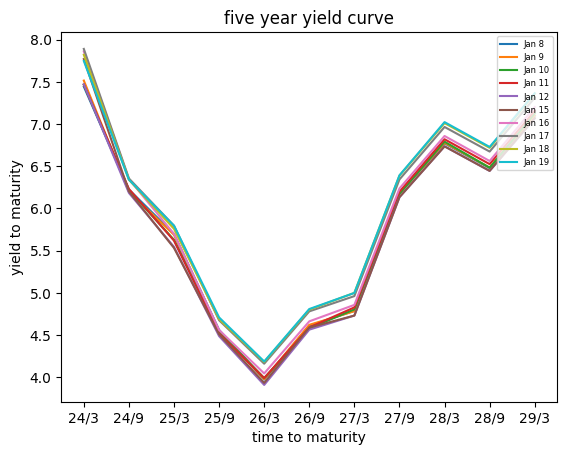

In [165]:
dates = ['Jan 8', 'Jan 9', 'Jan 10', 'Jan 11', 'Jan 12', 'Jan 15', 'Jan 16', 'Jan 17', 'Jan 18', 'Jan 19']
plt.xlabel('time to maturity')
plt.ylabel('yield to maturity')
plt.title('five year yield curve')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = ['24/3','24/9','25/3','25/9', '26/3', '26/9', '27/3', '27/9', '28/3', '28/9','29/3'])
for i in range(10):
    plt.plot(day_to_full_ytm_dict[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})

plt.show()

In [156]:
#Question 4(b)
def total_spot_rate_present_value(face_value, coupon, periods, rate, year_fraction_dict, spot_rate_list, with_gap):
    total_pv = 0
    total_periods = periods


    if with_gap == False:
        for i in range(total_periods):
            total_pv += coupon * math.exp(-year_fraction_dict[i] * (spot_rate_list[i]/100))
        total_pv += face_value * math.exp(-year_fraction_dict[i+1] * rate)
    else:
        for i in range(total_periods - 1):
            total_pv += coupon * math.exp(-year_fraction_dict[i] * (spot_rate_list[i]/100))
    
        total_pv += coupon * math.exp(-year_fraction_dict[i+1] * ((spot_rate_list[-1]/100 + rate)/2))
        
        total_pv += face_value * math.exp(-year_fraction_dict[i+2] * rate)


    return total_pv


def calculate_spot_rate(bond, day, bond_index, year_fraction_dict, spot_rate_list, ytm_list, with_gap):
    present_value = calculate_present_value(bond, day)
    face_value = bond.coupon_rate + 100
    coupon = bond.coupon_rate
    periods = bond.periods
    spot_rate_one = ytm_list[bond_index]/100

    condition_one = True
    while condition_one:
        if (present_value < face_value):
            spot_rate_one -= 0.000001
        else:
            spot_rate_one += 0.000001
 
        total_pv_one = total_spot_rate_present_value(face_value, coupon, periods,
                                      spot_rate_one, year_fraction_dict,
                                      spot_rate_list, with_gap)

        if (present_value < face_value):
            condition_one = total_pv_one < present_value
        else:
            condition_one = total_pv_one > present_value

    spot_rate_two= ytm_list[bond_index]/100
    condition_two = True
    while condition_two:
        if (present_value < face_value):
            spot_rate_two += 0.000001
        else:
            spot_rate_two -= 0.000001

        total_pv_two = total_spot_rate_present_value(face_value, coupon, periods,
                                      spot_rate_two, year_fraction_dict,
                                      spot_rate_list, with_gap)
        
        if (present_value < face_value):
            condition_two = total_pv_two > present_value
        else:
            condition_two = total_pv_two < present_value


    return max(spot_rate_one*100, spot_rate_two*100)


In [157]:
def generate_spot_rate_per_day(bonds_list, day_to_year_fraction_dict):
    spot_rate_dict = {}
    for i in range(10):
        spot_rate_list = []
        for j in range(len(bonds_list)):
            ytm_list = day_to_raw_ytm_dict[i]

            if j == 0:
                spot_rate_list.append(ytm_list[0])
            if j >= 1:
                prev_bond = bonds_list[j-1]
                bond = bonds_list[j]
                if calculate_year_difference(prev_bond.maturity_date, 
                                             bond.maturity_date) > 0.6:
                    spot_rate = calculate_spot_rate(bond, i, j,
                                                    day_to_year_fraction_dict[i],
                                                    spot_rate_list, 
                                                    ytm_list, True)
                    spot_rate_list.append((spot_rate_list[-1] + spot_rate)/2)
                    spot_rate_list.append(spot_rate)
                else:
                    spot_rate = calculate_spot_rate(bond, i, j,
                                                    day_to_year_fraction_dict[i],
                                                    spot_rate_list,
                                                    ytm_list, False)
                    spot_rate_list.append(spot_rate)
        print(spot_rate_list)
        spot_rate_dict[i] = spot_rate_list
    return spot_rate_dict

                    
spot_rate_dict = generate_spot_rate_per_day(bonds_list, day_to_year_fraction_dict)  

[7.443800000005194, 6.224200000004616, 5.697500000003906, 4.560600000002461, 3.972000000001906, 4.611100000002636, 4.7871000000029955, 6.311000000003561, 7.005300000003506, 6.626500000003377, 7.395500000003395]
[7.515500000005265, 6.199300000004591, 5.688100000003896, 4.545000000002446, 3.976900000001911, 4.620800000002645, 4.782300000002991, 6.307100000003557, 7.012000000003512, 6.632600000003383, 7.400600000003401]
[7.465400000005215, 6.215400000004607, 5.628000000003836, 4.5452000000024455, 3.990000000001924, 4.578300000002603, 4.805800000003014, 6.305300000003555, 7.028700000003529, 6.6317000000033826, 7.430800000003431]
[7.468000000005218, 6.231700000004623, 5.6184000000038266, 4.51930000000242, 3.990000000001924, 4.589700000002614, 4.830300000003039, 6.332900000003583, 7.060300000003561, 6.6783000000034285, 7.463400000003463]
[7.47080000000522, 6.184200000004576, 5.544400000003753, 4.486900000002387, 3.908800000001843, 4.563800000002588, 4.73210000000294, 6.265900000003516, 6.973

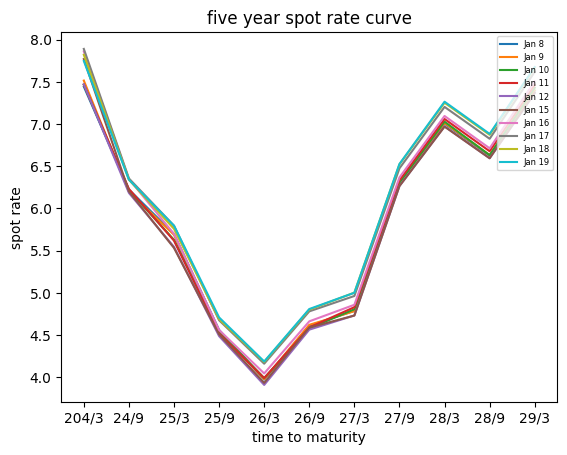

In [168]:

dates = ['Jan 8', 'Jan 9', 'Jan 10', 'Jan 11', 'Jan 12', 'Jan 15', 'Jan 16', 'Jan 17', 'Jan 18', 'Jan 19']
plt.xlabel('time to maturity')
plt.ylabel('spot rate')
plt.title('five year spot rate curve')
axes = plt.gca()

plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = ['204/3','24/9','25/3','25/9', '26/3', '26/9', '27/3', '27/9', '28/3', '28/9','29/3'])
for i in range(10):
    plt.plot(spot_rate_dict[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.show()

In [159]:
#Question 4 (c)
def generate_forward_rate(spot_rate_dict):
    forward_rate_dict = {}
    for i in range(len(spot_rate_dict)):
        forward_rate_list = []
        r_0_1 = spot_rate_dict[i][2]

        j = 2
        k = 4
        print
        while(k < len(spot_rate_dict[0])):
            forward = (spot_rate_dict[i][k] * j - r_0_1)/(j-1)
            forward_rate_list.append(forward)        
            j += 1
            k += 2
            
        print(forward_rate_list)
        forward_rate_dict[i] = forward_rate_list
    return forward_rate_dict


forward_rate_dict = generate_forward_rate(spot_rate_dict)

[2.246499999999906, 4.33190000000254, 7.441233333336705, 7.820000000003267]
[2.265699999999926, 4.329400000002538, 7.453300000003384, 7.828725000003277]
[2.352000000000012, 4.394700000002603, 7.495600000003427, 7.88150000000333]
[2.3616000000000215, 4.436250000002644, 7.540933333336806, 7.924650000003372]
[2.2731999999999326, 4.325950000002533, 7.449333333336713, 7.8216500000032685]
[2.3342999999999936, 4.330550000002537, 7.44910000000338, 7.831650000003278]
[2.39130000000005, 4.438650000002648, 7.561700000003493, 7.959250000003407]
[2.5252000000001864, 4.546550000002755, 7.672933333336938, 8.074975000003523]
[2.603700000000263, 4.624300000002833, 7.750966666670348, 8.147050000003595]
[2.5768000000002367, 4.603450000002811, 7.754733333337019, 8.145925000003594]


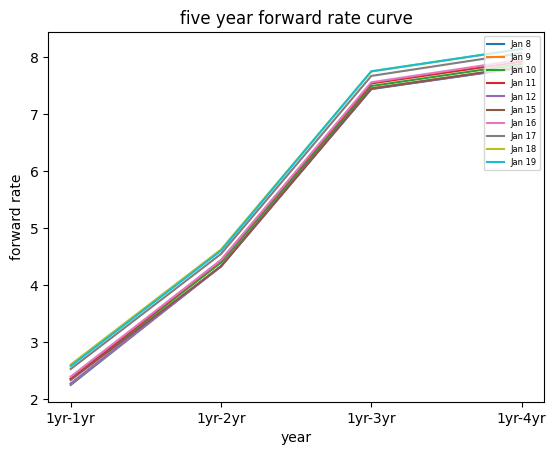

In [169]:
dates = ['Jan 8', 'Jan 9', 'Jan 10', 'Jan 11', 'Jan 12', 'Jan 15', 'Jan 16', 'Jan 17', 'Jan 18', 'Jan 19']
plt.xlabel('year')
plt.ylabel('forward rate')
plt.title('five year forward rate curve')
axes = plt.gca()
plt.xticks(ticks = [0, 1, 2, 3],labels = ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'])
for i in range(10):
    plt.plot(forward_rate_dict[i], label = dates[i])
plt.legend(loc=1, prop={'size': 6})
plt.show()

In [161]:
#Question 6
#covariance matrix for log returns
def calculate_ytm_cov(day_to_full_ytm_dict):
    ytm_list = []
    for i in range(10):
        j = 1
        temp = []
        while (j < len(day_to_full_ytm_dict[0])):
            temp.append(day_to_full_ytm_dict[i][j])
            j += 2
        ytm_list.append(temp)

    ytm_list = np.array(ytm_list).transpose()

    log_returns = np.zeros((5, 9))
    for i in range(len(ytm_list)):
        for j in range(len(ytm_list[i])-1):
            log_returns[i][j] = math.log(ytm_list[i][j]/ytm_list[i][j+1])

    return np.cov(log_returns)

ytm_cov_log_returns = calculate_ytm_cov(day_to_full_ytm_dict)
print(ytm_cov_log_returns)

[[7.67469838e-05 3.66186224e-05 4.22828583e-05 5.19946110e-05
  5.66914073e-05]
 [3.66186224e-05 9.85219229e-05 9.05480317e-05 7.22000457e-05
  7.13640494e-05]
 [4.22828583e-05 9.05480317e-05 1.08180303e-04 7.99725810e-05
  8.17642762e-05]
 [5.19946110e-05 7.22000457e-05 7.99725810e-05 7.76638792e-05
  8.12751919e-05]
 [5.66914073e-05 7.13640494e-05 8.17642762e-05 8.12751919e-05
  8.63136523e-05]]


In [170]:
#covariance matrix for forward rates
def calculate_forward_cov(forward_rate_dict):
    forward_rate_list = []
    for i in range(10):
        j = 0
        temp = []
        while (j < len(forward_rate_dict[0])):
            temp.append(forward_rate_dict[i][j])
            j += 1
        forward_rate_list.append(temp)

    forward_rate_list = np.array(forward_rate_list).transpose()

    log_returns = np.zeros((4, 9))
    for i in range(len(forward_rate_list)):
        for j in range(len(forward_rate_list[i])-1):
            log_returns[i][j] = math.log(forward_rate_list[i][j]/forward_rate_list[i][j+1])

    return np.cov(log_returns)

forward_cov_log_returns = calculate_forward_cov(forward_rate_dict)
print(forward_cov_log_returns)

[[7.68764452e-04 3.90566016e-04 1.93579403e-04 2.05418905e-04]
 [3.90566016e-04 2.53753793e-04 1.32430581e-04 1.37836540e-04]
 [1.93579403e-04 1.32430581e-04 7.15138626e-05 7.35601440e-05]
 [2.05418905e-04 1.37836540e-04 7.35601440e-05 7.65333604e-05]]


In [163]:
#Question 6
ytm_w, ytm_v = LA.eig(ytm_cov_log_returns)
print(ytm_w)
print(ytm_v)

forward_w, forward_v = LA.eig(forward_cov_log_returns)
print(forward_w)
print(forward_v)

[3.62722040e-04 5.75609791e-05 1.61625450e-05 1.06924649e-05
 2.88712357e-07]
[[ 0.31048501  0.81448297  0.43335636 -0.22884966 -0.00683012]
 [ 0.46809282 -0.42248306  0.66533438  0.38854391  0.09360003]
 [ 0.51058971 -0.34652654 -0.12488589 -0.77691575 -0.0047886 ]
 [ 0.45200915  0.09028822 -0.33865596  0.31589307 -0.75700692]
 [ 0.46848057  0.17289579 -0.48912992  0.30540947  0.64661424]]
[1.09998486e-03 6.86381159e-05 1.58989466e-06 3.52596360e-07]
[[ 0.82409058  0.56266402  0.06491001 -0.00840307]
 [ 0.45619584 -0.59299879 -0.66013098 -0.06681973]
 [ 0.2312663  -0.41751042  0.59987198 -0.64214839]
 [ 0.24346657 -0.39679553  0.4474007   0.76361637]]
